# Import libraries

In [12]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [13]:
df_train = pd.read_csv("/Users/Gabrielle/Desktop/Project/bank-train.csv", sep=',')
df_test = pd.read_csv("/Users/Gabrielle/Desktop/Project/bank-test.csv", sep=',')

# Rename last column
df_train = df_train.rename(columns={'y' : 'subscription'})
df_test = df_test.rename(columns={'y' : 'subscription'})

# Show sample
df_train.head(5)
df_test.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,15714,58,admin.,married,secondary,no,1455,yes,no,cellular,21,jul,119,1,-1,0,unknown,no
1,27567,46,management,married,secondary,no,149,no,no,cellular,21,nov,1222,2,-1,0,unknown,yes
2,22371,33,technician,single,tertiary,no,99,no,no,cellular,22,aug,296,2,-1,0,unknown,no
3,36742,36,entrepreneur,single,primary,no,5,no,no,cellular,12,may,396,1,172,3,failure,no
4,3522,44,blue-collar,married,primary,no,0,yes,no,unknown,15,may,226,6,-1,0,unknown,no


# Data preprocessing

In [14]:
from sklearn.preprocessing import LabelEncoder

job_labelenc_train = LabelEncoder()
job_labelenc_test = LabelEncoder()

marital_labelenc_train = LabelEncoder()
marital_labelenc_test = LabelEncoder()

contact_labelenc_train = LabelEncoder()
contact_labelenc_test = LabelEncoder()

poutcome_labelenc_train = LabelEncoder()
poutcome_labelenc_test = LabelEncoder()

def preproc_education_train(x):
    if(x == 'unknown') : return 0
    elif(x == 'primary') : return 1
    elif(x == 'secondary') : return 2
    elif(x == 'tertiary') : return 3

def preproc_education_test(x):
    if(x == 'unknown') : return 0
    elif(x == 'primary') : return 1
    elif(x == 'secondary') : return 2
    elif(x == 'tertiary') : return 3
    
def preproc_month_train(x):
    if(x == 'jan') : return 1
    elif(x == 'feb') : return 2
    elif(x == 'mar') : return 3
    elif(x == 'apr') : return 4
    elif(x == 'may') : return 5
    elif(x == 'jun') : return 6
    elif(x == 'jul') : return 7
    elif(x == 'aug') : return 8
    elif(x == 'sep') : return 9
    elif(x == 'oct') : return 10
    elif(x == 'nov') : return 11
    elif(x == 'dec') : return 12
    
def preproc_month_test(x):
    if(x == 'jan') : return 1
    elif(x == 'feb') : return 2
    elif(x == 'mar') : return 3
    elif(x == 'apr') : return 4
    elif(x == 'may') : return 5
    elif(x == 'jun') : return 6
    elif(x == 'jul') : return 7
    elif(x == 'aug') : return 8
    elif(x == 'sep') : return 9
    elif(x == 'oct') : return 10
    elif(x == 'nov') : return 11
    elif(x == 'dec') : return 12   
    
def preproc_binary_train(x):
    if(x == 'no') : return 0
    elif(x == 'yes') : return 1

def preproc_binary_test(x):
    if(x == 'no') : return 0
    elif(x == 'yes') : return 1
    

In [15]:
# ALl preprocessing steps
# For training set
df_train['job'] = job_labelenc_train.fit_transform(df_train['job'])
df_train['marital'] = marital_labelenc_train.fit_transform(df_train['marital'])
df_train['contact'] = contact_labelenc_train.fit_transform(df_train['contact'])
df_train['poutcome'] = poutcome_labelenc_train.fit_transform(df_train['poutcome'])
df_train['education'] = df_train['education'].apply(preproc_education_train)
df_train['month'] = df_train['month'].apply(preproc_month_train)
df_train['default'] = df_train['default'].apply(preproc_binary_train)
df_train['housing'] = df_train['housing'].apply(preproc_binary_train)
df_train['loan'] = df_train['loan'].apply(preproc_binary_train)

print(df_train.head(5))

# For testing set
df_test['job'] = job_labelenc_test.fit_transform(df_test['job'])
df_test['marital'] = marital_labelenc_test.fit_transform(df_test['marital'])
df_test['contact'] = contact_labelenc_test.fit_transform(df_test['contact'])
df_test['poutcome'] = poutcome_labelenc_train.fit_transform(df_test['poutcome'])
df_test['education'] = df_test['education'].apply(preproc_education_test)
df_test['month'] = df_test['month'].apply(preproc_month_test)
df_test['default'] = df_test['default'].apply(preproc_binary_test)
df_test['housing'] = df_test['housing'].apply(preproc_binary_test)
df_test['loan'] = df_test['loan'].apply(preproc_binary_test)

print(df_test.head(5))

   Unnamed: 0  age  job  marital  education  default  balance  housing  loan  \
0        1179   42    9        1          2        0      420        1     0   
1       18721   35    4        2          2        0     2383        1     0   
2       34471   32    0        2          2        0       12        1     0   
3       40932   74    5        1          2        0      291        0     0   
4        5707   29    8        1          3        0      149        1     0   

   contact  day  month  duration  campaign  pdays  previous  poutcome  \
0        2    8      5        94         1     -1         0         3   
1        0   31      7        67         6     -1         0         3   
2        0    5      5       242         1    365         2         0   
3        0   12      8       543         1     -1         0         3   
4        2   26      5       367         4     -1         0         3   

  subscription  
0           no  
1           no  
2           no  
3           

# Extract features and labels

In [16]:
# Extract features and labels from datafram
X_train = df_train.drop("subscription", axis=1)  
y_train = df_train["subscription"]  

X_test = df_test.drop("subscription", axis=1)  
y_test = df_test["subscription"]  

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Check the data type of each feature
feature_data_types = X_train.dtypes

# Print features whose data type is string
string_features = feature_data_types[feature_data_types == 'object']
print(string_features)

X_train shape: (36168, 17)
y_train shape: (36168,)
X_test shape: (9043, 17)
y_test shape: (9043,)
Series([], dtype: object)


# Build Naive Bayes Model

              precision    recall  f1-score   support

          no       0.93      0.88      0.90      7953
         yes       0.37      0.52      0.43      1090

    accuracy                           0.84      9043
   macro avg       0.65      0.70      0.67      9043
weighted avg       0.86      0.84      0.85      9043

[[7003  950]
 [ 525  565]]


0.34777088420926633

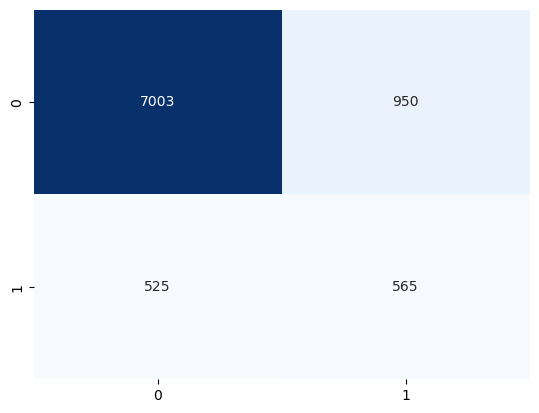

In [17]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)

# View classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['no' ,'yes']))

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix (y_test, y_pred)
print (conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Calculate MCC
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


# k Fold Cross Validation 

In [18]:
# Applying 5-Fold Cross Validation 
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(estimator = classifier,
                             X = X_train,
                             y = y_train, cv = 5)
print(cv_score)

[0.8422726  0.85125795 0.83466962 0.83672059 0.83644408]


# Performance Evaluation

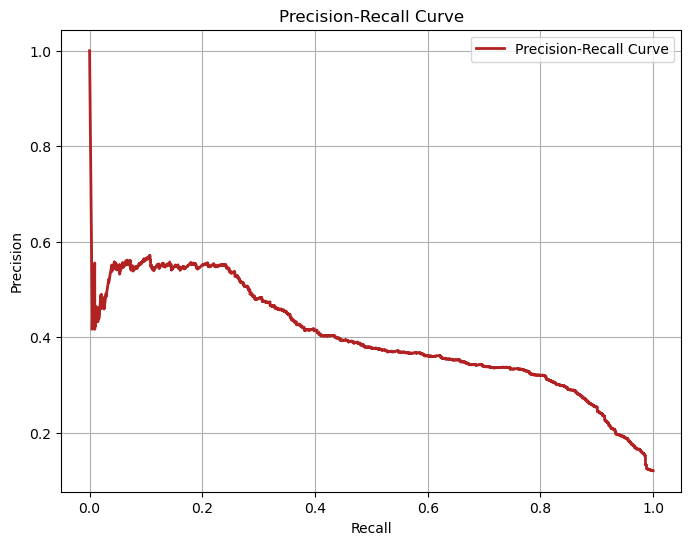

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

from sklearn.preprocessing import LabelEncoder

# Encoding
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Use the model to make predictions
y_scores = classifier.predict_proba(X_test)[:, 1]  # 获取正类别的概率分数

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, y_scores)

# Plot Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='firebrick', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend(loc='best')
plt.show()



In [23]:
# ROC & AUC

from sklearn.metrics import roc_curve, roc_auc_score

# Encoding
y_pred_binary = label_encoder.transform(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary, pos_label=1)

# Calculate AUC
auc_score = roc_auc_score(y_test_binary, y_pred_binary)

print(auc_score)


0.6994484223251972


/var/folders/c1/wstzjgjn2z977qp6_34b_1r00000gn/T/ipykernel_10071/262055821.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


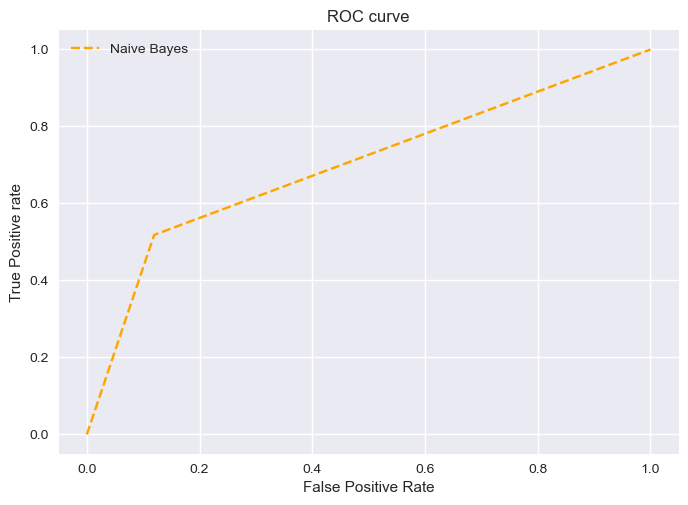

In [21]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Naive Bayes')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();